In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [79]:
df = pd.read_csv("2017_supervised_df.csv")
df.head()

,Unnamed: 0,year,latitude,longitude,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,sun hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,production
0,0,2017,31.670,65.795,28.522802,13.934341,170.0,165.1,3.99,286.0,0 days 12:13:23.736263736,14.671154,28.507418,193.491758,7925.85,2077.55,18.29
1,1,2017,31.623,65.792,28.940385,14.089286,153.1,149.3,3.29,248.0,0 days 12:13:22.417582417,14.989835,28.172253,208.145604,7927.64,2096.22,18.72
2,2,2017,27.908,-0.317,33.416484,19.535165,9.5,9.5,0.00,16.0,0 days 12:12:33.461538461,24.167308,38.230220,103.574176,8215.00,3120.31,35.17
3,3,2017,35.880,5.475,21.605769,10.721703,267.5,235.5,22.89,620.0,0 days 12:14:24.065934065,14.612088,36.694780,191.601648,6807.89,1393.39,38.75
4,4,2017,34.532,0.804,23.782418,10.596978,154.7,123.3,22.68,358.0,0 days 12:14:01.153846153,19.524725,34.594231,204.541209,7287.63,1758.49,35.46


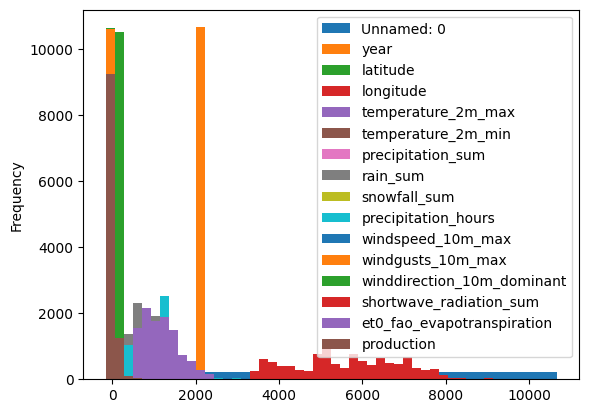

In [80]:
df.plot.hist(bins=50)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10665 non-null  int64  
 1   year                        10665 non-null  int64  
 2   latitude                    10665 non-null  float64
 3   longitude                   10665 non-null  float64
 4   temperature_2m_max          10620 non-null  float64
 5   temperature_2m_min          10620 non-null  float64
 6   precipitation_sum           10665 non-null  float64
 7   rain_sum                    10665 non-null  float64
 8   snowfall_sum                10665 non-null  float64
 9   precipitation_hours         10665 non-null  float64
 10  sun hours                   10665 non-null  object 
 11  windspeed_10m_max           10620 non-null  float64
 12  windgusts_10m_max           10620 non-null  float64
 13  winddirection_10m_dominant  106

In [82]:
# Per transformar un sun hours a float

def strdate_to_float(column:pd.Series) -> pd.Series:
    column = column.str.lstrip("0").str.strip(" days").str[0:8]
    new_column = (column.str[:2]).astype(float)*60 + (column.str[3:5]).astype(float) + (column.str[6:8]).astype(float)/60
    return new_column

In [83]:
df["sun hours"] = strdate_to_float(df["sun hours"])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10665 non-null  int64  
 1   year                        10665 non-null  int64  
 2   latitude                    10665 non-null  float64
 3   longitude                   10665 non-null  float64
 4   temperature_2m_max          10620 non-null  float64
 5   temperature_2m_min          10620 non-null  float64
 6   precipitation_sum           10665 non-null  float64
 7   rain_sum                    10665 non-null  float64
 8   snowfall_sum                10665 non-null  float64
 9   precipitation_hours         10665 non-null  float64
 10  sun hours                   10665 non-null  float64
 11  windspeed_10m_max           10620 non-null  float64
 12  windgusts_10m_max           10620 non-null  float64
 13  winddirection_10m_dominant  106

In [85]:
percent_missing = df.isnull().sum()
percent_missing

Unnamed: 0                     0
year                           0
latitude                       0
longitude                      0
temperature_2m_max            45
temperature_2m_min            45
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
sun hours                      0
windspeed_10m_max             45
windgusts_10m_max             45
winddirection_10m_dominant    45
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
production                     0
dtype: int64

In [104]:
nan = np.nan
imputer =KNNImputer(n_neighbors=3)

In [116]:
df_without2col = df.drop(["Unnamed: 0", "year"], axis=1)
df_array = imputer.fit_transform(df_without2col)
df_array

array([[ 3.16700000e+01,  6.57950000e+01,  2.85228022e+01, ...,
         7.92585000e+03,  2.07755000e+03,  1.82900000e+01],
       [ 3.16230000e+01,  6.57920000e+01,  2.89403846e+01, ...,
         7.92764000e+03,  2.09622000e+03,  1.87200000e+01],
       [ 2.79080000e+01, -3.17000000e-01,  3.34164835e+01, ...,
         8.21500000e+03,  3.12031000e+03,  3.51700000e+01],
       ...,
       [ 1.64400000e+01,  1.07505000e+02,  2.87986264e+01, ...,
         5.52948000e+03,  1.17301000e+03,  7.86800000e+01],
       [ 1.17000000e+01,  1.09030000e+02,  3.10439560e+01, ...,
         6.68364000e+03,  1.43277000e+03,  3.40910000e+02],
       [-1.55500000e+01,  2.83500000e+01,  2.58851648e+01, ...,
         7.07249000e+03,  1.55974000e+03,  1.21280000e+02]])

In [117]:
df_df = pd.DataFrame(df_array)
df_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,31.670,65.795,28.522802,13.934341,170.0,165.1,3.99,286.0,733.383333,14.671154,28.507418,193.491758,7925.85,2077.55,18.29
1,31.623,65.792,28.940385,14.089286,153.1,149.3,3.29,248.0,733.366667,14.989835,28.172253,208.145604,7927.64,2096.22,18.72
2,27.908,-0.317,33.416484,19.535165,9.5,9.5,0.00,16.0,732.550000,24.167308,38.230220,103.574176,8215.00,3120.31,35.17
3,35.880,5.475,21.605769,10.721703,267.5,235.5,22.89,620.0,734.400000,14.612088,36.694780,191.601648,6807.89,1393.39,38.75
4,34.532,0.804,23.782418,10.596978,154.7,123.3,22.68,358.0,734.016667,19.524725,34.594231,204.541209,7287.63,1758.49,35.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,11.700,108.900,30.843956,25.140659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1427.46,283.13
10661,11.446,108.866,30.992582,25.290659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1431.54,576.93
10662,16.440,107.505,28.798626,23.928846,3971.5,3971.5,0.00,3559.0,730.716667,13.503846,29.880769,149.928571,5529.48,1173.01,78.68
10663,11.700,109.030,31.043956,25.340659,1846.0,1846.0,0.00,2354.0,730.183333,10.906319,34.237363,111.502747,6683.64,1432.77,340.91


In [118]:
df_df.columns = list(df_without2col.columns.values)
df_df

,latitude,longitude,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,sun hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,production
0,31.670,65.795,28.522802,13.934341,170.0,165.1,3.99,286.0,733.383333,14.671154,28.507418,193.491758,7925.85,2077.55,18.29
1,31.623,65.792,28.940385,14.089286,153.1,149.3,3.29,248.0,733.366667,14.989835,28.172253,208.145604,7927.64,2096.22,18.72
2,27.908,-0.317,33.416484,19.535165,9.5,9.5,0.00,16.0,732.550000,24.167308,38.230220,103.574176,8215.00,3120.31,35.17
3,35.880,5.475,21.605769,10.721703,267.5,235.5,22.89,620.0,734.400000,14.612088,36.694780,191.601648,6807.89,1393.39,38.75
4,34.532,0.804,23.782418,10.596978,154.7,123.3,22.68,358.0,734.016667,19.524725,34.594231,204.541209,7287.63,1758.49,35.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,11.700,108.900,30.843956,25.140659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1427.46,283.13
10661,11.446,108.866,30.992582,25.290659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1431.54,576.93
10662,16.440,107.505,28.798626,23.928846,3971.5,3971.5,0.00,3559.0,730.716667,13.503846,29.880769,149.928571,5529.48,1173.01,78.68
10663,11.700,109.030,31.043956,25.340659,1846.0,1846.0,0.00,2354.0,730.183333,10.906319,34.237363,111.502747,6683.64,1432.77,340.91


In [119]:
percent_missing = df_df.isnull().sum()
percent_missing

latitude                      0
longitude                     0
temperature_2m_max            0
temperature_2m_min            0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
sun hours                     0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
shortwave_radiation_sum       0
et0_fao_evapotranspiration    0
production                    0
dtype: int64

In [121]:
# Drop features that we're not interested in train
X = df_df.drop(["production"], axis=1)
y = df["production"]

In [126]:
X

,latitude,longitude,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,sun hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,31.670,65.795,28.522802,13.934341,170.0,165.1,3.99,286.0,733.383333,14.671154,28.507418,193.491758,7925.85,2077.55
1,31.623,65.792,28.940385,14.089286,153.1,149.3,3.29,248.0,733.366667,14.989835,28.172253,208.145604,7927.64,2096.22
2,27.908,-0.317,33.416484,19.535165,9.5,9.5,0.00,16.0,732.550000,24.167308,38.230220,103.574176,8215.00,3120.31
3,35.880,5.475,21.605769,10.721703,267.5,235.5,22.89,620.0,734.400000,14.612088,36.694780,191.601648,6807.89,1393.39
4,34.532,0.804,23.782418,10.596978,154.7,123.3,22.68,358.0,734.016667,19.524725,34.594231,204.541209,7287.63,1758.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,11.700,108.900,30.843956,25.140659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1427.46
10661,11.446,108.866,30.992582,25.290659,1846.0,1846.0,0.00,2354.0,730.150000,10.906319,34.237363,111.502747,6683.64,1431.54
10662,16.440,107.505,28.798626,23.928846,3971.5,3971.5,0.00,3559.0,730.716667,13.503846,29.880769,149.928571,5529.48,1173.01
10663,11.700,109.030,31.043956,25.340659,1846.0,1846.0,0.00,2354.0,730.183333,10.906319,34.237363,111.502747,6683.64,1432.77


In [127]:
y

0         18.29
1         18.72
2         35.17
3         38.75
4         35.46
          ...  
10660    283.13
10661    576.93
10662     78.68
10663    340.91
10664    121.28
Name: production, Length: 10665, dtype: float64

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


In [141]:
model =()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [139]:
Scaling numerical features (all) & training the model
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)

In [144]:
minmax_scaler

MinMaxScaler()

In [145]:
cv_results = cross_validate(model,X_train,y_train,cv=10)
cv_results

{'fit_time': array([0.00526786, 0.00467706, 0.00460601, 0.00459862, 0.00454783,
        0.00467396, 0.00463223, 0.00463772, 0.00468707, 0.0048008 ]),
 'score_time': array([0.00825977, 0.00779796, 0.00778127, 0.00838351, 0.00768209,
        0.00754213, 0.00693011, 0.007936  , 0.00833845, 0.00729966]),
 'test_score': array([0.29170391, 0.10608377, 0.1010924 , 0.15637006, 0.15621551,
        0.10116344, 0.10011455, 0.20510521, 0.12863372, 0.06060572])}